<a href="https://colab.research.google.com/github/Vedangini-Kenma/restaurant/blob/main/restaurant.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
import pandas as pd

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
path='/content/drive/MyDrive/restaurants  - Sheet1.csv'
df=pd.read_csv(path)
print(df.shape)
print(df.info())
print(df.describe())

(499, 7)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 499 entries, 0 to 498
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             499 non-null    object 
 1   max seats        499 non-null    int64  
 2   price per plate  499 non-null    object 
 3   stars            499 non-null    float64
 4   views            499 non-null    int64  
 5   min seats        499 non-null    float64
 6   region           499 non-null    object 
dtypes: float64(2), int64(2), object(3)
memory usage: 27.4+ KB
None
         max seats       stars         views   min seats
count   499.000000  499.000000    499.000000  499.000000
mean    129.843687    3.414629   1219.953908   18.083768
std     212.718736    0.703553   1588.829098   34.193408
min       4.000000    2.000000      1.000000    1.000000
25%      50.000000    3.000000    381.500000    5.000000
50%      80.000000    3.400000   1000.000000   10.000000
75%   

identifing Outliers with IQR

In [6]:
q1=df.quantile(0.25)
q3=df.quantile(0.75)
iqr=q3-q1
print(iqr)
lower_limit = (q1 - 1.5 * iqr)
upper_limit = (q3 + 1.5 * iqr)
print('lower limits are ->',lower_limit,'upper limits are ->',upper_limit)
print((df <lower_limit ) |(df >upper_limit ))

max seats      80.0
stars           1.0
views        1115.5
min seats      10.0
dtype: float64
lower limits are -> max seats     -70.00
stars           1.50
views       -1291.75
min seats     -10.00
dtype: float64 upper limits are -> max seats     250.00
stars           5.50
views        3170.25
min seats      30.00
dtype: float64
     max seats  min seats   name  price per plate  region  stars  views
0        False      False  False            False   False  False   True
1        False      False  False            False   False  False  False
2        False      False  False            False   False  False  False
3        False      False  False            False   False  False   True
4        False      False  False            False   False  False   True
..         ...        ...    ...              ...     ...    ...    ...
494      False      False  False            False   False  False  False
495      False      False  False            False   False  False  False
496      False     

identifying Outliers with Visualization

variation in views though stars are same


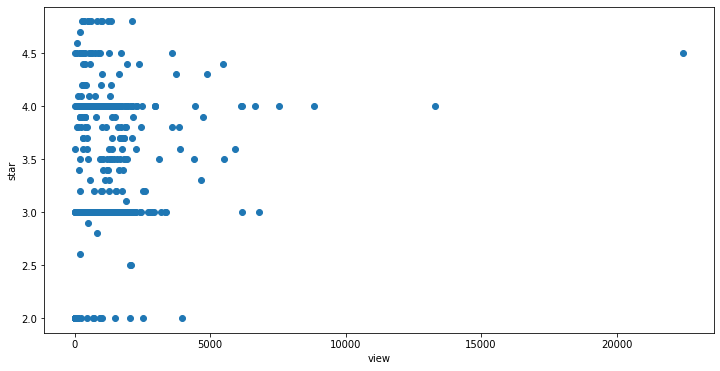

In [7]:
fig, ax = plt.subplots(figsize=(12,6))
ax.scatter( df['views'],df['stars'])
ax.set_xlabel('view')
ax.set_ylabel('star')
print("variation in views though stars are same")
plt.show()


Trimming


In [9]:
new_df = df[(df['views'] >=3170 )|(df['views'] <= 1292)].index
df.drop(new_df, inplace=True)
new_df.shape
df['views'].describe()






count     143.000000
mean     1787.174825
std       422.336181
min      1296.000000
25%      1444.500000
50%      1692.000000
75%      2021.000000
max      3103.000000
Name: views, dtype: float64

comparing after trimming



/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


IndexError: ignored

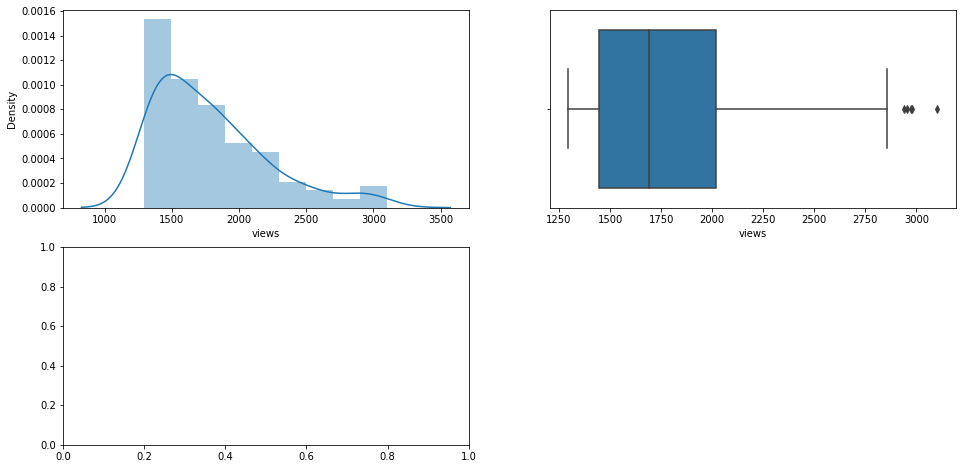

In [10]:
plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.distplot(df['views'])
plt.subplot(2,2,2)
sns.boxplot(df['views'])
plt.subplot(2,2,3)
sns.distplot(new_df['views'])
plt.subplot(2,2,4)
sns.boxplot(new_df['views'])
plt.show()

Restaurants having profitable business

In [31]:
df.to_dict('records')

[{'max seats': 100,
  'min seats': 10.0,
  'name': 'Hotel Amara',
  'price per plate': '1000',
  'region': 'south delhi',
  'stars': 4.5,
  'views': 1715},
 {'max seats': 50,
  'min seats': 15.0,
  'name': 'Sandoz',
  'price per plate': '900',
  'region': 'north west delhi',
  'stars': 4.2,
  'views': 1352},
 {'max seats': 100,
  'min seats': 20.0,
  'name': 'Banquet Hall of The Veggie Bites',
  'price per plate': '699',
  'region': 'north west delhi',
  'stars': 4.3,
  'views': 1655},
 {'max seats': 125,
  'min seats': 15.0,
  'name': 'Viva Banquet of Viva Palace',
  'price per plate': '800',
  'region': 'south west delhi',
  'stars': 4.8,
  'views': 1346},
 {'max seats': 30,
  'min seats': 10.0,
  'name': 'Restaurant of Bite Bikaner',
  'price per plate': '700',
  'region': 'south west delhi',
  'stars': 4.4,
  'views': 2369},
 {'max seats': 125,
  'min seats': 30.0,
  'name': 'Fete of Fete By Essex Farms Garden And Hall',
  'price per plate': '1500',
  'region': 'south delhi',
  'st